---
### <center> Carga de Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import kendalltau
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
# Carga y visualización parcial de Datos sobre la Demanda de energía eléctrica de los últimos años:
df_dem = pd.read_csv('datasets/demanda-ltimos-aos.csv')
df_dem.head(2)

,id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,fecha_proceso,lote_id_log,indice_tiempo
0,699232,2017,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1990.439,2020-05-05 11:06:49.000713,67,2017-01
1,699233,2017,1,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1609.464,2020-05-05 11:06:49.000713,67,2017-01


In [28]:
# Carga y visualización parcial de Datos sobre la Generación de energía eléctrica de los últimos años:
df_gen = pd.read_csv('datasets/generacin-ltimos-aos.csv')
df_gen.head(2)

,id,anio,mes,maquina,central,agente,agente_descripcion,region,pais,tipo_maquina,fuente_generacion,tecnologia,categoria_hidraulica,categoria_region,generacion_neta_MWh,fecha_proceso,lote_id_log,indice_tiempo
0,481607,2017,1,3ARRDI01,3ARR,QUIL3A3A,QUILMES - PLANTA TRES ARROYOS,BUENOS AIRES,Argentina,MOTOR DIESEL,Térmica,DI,NaN,Gba - Litoral - Buenos Aires,0.000,2020-05-05 11:06:29.851206,67,2017-01
1,481608,2017,1,ABRODI01,ABRO,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Argentina,MOTOR DIESEL,Térmica,DI,NaN,Gba - Litoral - Buenos Aires,109.454,2020-05-05 11:06:29.851206,67,2017-01


---
### <center> Preparación de Datos

In [29]:
df_dem.columns

Index(['id', 'anio', 'mes', 'agente_nemo', 'agente_descripcion', 'tipo_agente',
       'region', 'provincia', 'categoria_area', 'categoria_demanda', 'tarifa',
       'categoria_tarifa', 'demanda_MWh', 'fecha_proceso', 'lote_id_log',
       'indice_tiempo'],
      dtype='object')

In [30]:
df_gen.columns

Index(['id', 'anio', 'mes', 'maquina', 'central', 'agente',
       'agente_descripcion', 'region', 'pais', 'tipo_maquina',
       'fuente_generacion', 'tecnologia', 'categoria_hidraulica',
       'categoria_region', 'generacion_neta_MWh', 'fecha_proceso',
       'lote_id_log', 'indice_tiempo'],
      dtype='object')

In [31]:
# Chequeo de registros duplicados:
df_dem.duplicated().value_counts()

False    40388
dtype: int64

In [32]:
# Chequeo de registros duplicados:
df_gen.duplicated().value_counts()

False    22444
dtype: int64

In [33]:
# Verificar los valores nulos:
valores_nulos = df_dem.isnull()

# Contar los valores nulos en cada columna
conteo_nulos = valores_nulos.sum()
conteo_nulos

id                    0
anio                  0
mes                   0
agente_nemo           0
agente_descripcion    0
tipo_agente           0
region                0
provincia             0
categoria_area        0
categoria_demanda     0
tarifa                0
categoria_tarifa      0
demanda_MWh           0
fecha_proceso         0
lote_id_log           0
indice_tiempo         0
dtype: int64

In [34]:
# Verificar los valores nulos:
valores_nulos = df_gen.isnull()

# Contar los valores nulos en cada columna
conteo_nulos = valores_nulos.sum()
conteo_nulos


id                          0
anio                        0
mes                         0
maquina                     0
central                     0
agente                      0
agente_descripcion          0
region                      0
pais                        0
tipo_maquina                0
fuente_generacion           0
tecnologia                  0
categoria_hidraulica    20242
categoria_region            0
generacion_neta_MWh         0
fecha_proceso               0
lote_id_log                 0
indice_tiempo               0
dtype: int64

In [35]:
df_gen['pais'].unique()

array(['Argentina'], dtype=object)

---
### <center> Análisis exploratorio de Datos

In [36]:
# Chequeo de registros con demandas negativos
condicion_negativos = df_dem['demanda_MWh'] < 0
filas_negativas = df_dem[condicion_negativos]
filas_negativas

,id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,fecha_proceso,lote_id_log,indice_tiempo
34,699266,2017,1,APELPALD,APELP,DI,COMAHUE,LA PAMPA,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
94,699325,2017,1,C16OCTUW,COOP. 16 DE OCTUBRE,DI,PATAGONICA,CHUBUT,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
103,699334,2017,1,C3AR3A3W,COOP. CELTA - TRES ARROYOS,DI,BUENOS AIRES,BUENOS AIRES,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
115,699346,2017,1,CALFAVQW,CALF NEUQUEN DISTRIBUIDOR,DI,COMAHUE,NEUQUEN,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
151,699382,2017,1,CBARKE3W,COOPERATIVA DE BARKER,DI,BUENOS AIRES,BUENOS AIRES,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,739227,2020,2,EDERSARD,EMP DE ENERGIA DE RIO NEGRO SA,DI,COMAHUE,RIO NEGRO,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02
40011,739243,2020,2,EDESASAD,EMP.DIST.ENERGIA DE SALTA,DI,NOROESTE,SALTA,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02
40066,739298,2020,2,EPESAFSD,EPESF DISTRIBUIDOR,DI,LITORAL,SANTA FE,Santa Fe,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02
40233,739465,2020,2,SECHEPHD,SECHEEP,DI,NORESTE,CHACO,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-0.001,2020-05-05 11:06:49.000713,67,2020-02


In [37]:
# No seleccionar las filas negativas. Condición para seleccionar no incluir los negativos 
condicion = (df_dem['demanda_MWh'] >= 0) 

# Reiniciar el índice de la serie booleana
#condicion = condicion.reset_index(drop=True)

df_dem = df_dem.loc[condicion]

In [38]:
# Chequeo de registros negativos con generación negativa
condicion_negativos = df_gen['generacion_neta_MWh'] < 0
filas_negativas = df_gen[condicion_negativos]
filas_negativas

,id,anio,mes,maquina,central,agente,agente_descripcion,region,pais,tipo_maquina,fuente_generacion,tecnologia,categoria_hidraulica,categoria_region,generacion_neta_MWh,fecha_proceso,lote_id_log,indice_tiempo


In [39]:
# Chequeo de provincias presentes:
df_dem['provincia'].value_counts()

BUENOS AIRES      21648
CHUBUT             2087
SANTA FE           2035
MENDOZA            1884
ENTRE RIOS         1264
NEUQUEN            1189
RIO NEGRO           999
CORDOBA             951
SAN JUAN            888
SANTA CRUZ          830
TUCUMAN             817
SAN LUIS            645
LA RIOJA            518
MISIONES            505
CORRIENTES          502
SALTA               467
SGO.DEL ESTERO      449
JUJUY               449
CATAMARCA           428
CHACO               391
LA PAMPA            350
FORMOSA             328
Name: provincia, dtype: int64

In [40]:
df_dem['region'].unique()

array(['GRAN BS.AS.', 'BUENOS AIRES', 'LITORAL', 'CUYO', 'PATAGONICA',
       'NORESTE', 'COMAHUE', 'NOROESTE', 'CENTRO'], dtype=object)

In [41]:
df_gen['region'].unique()

array(['BUENOS AIRES', 'GRAN BS.AS.', 'COMAHUE', 'CUYO', 'NORESTE',
       'PATAGONICA', 'NOROESTE', 'LITORAL', 'CENTRO', 'GENERAC MOVIL'],
      dtype=object)

In [42]:
# No seleccionamos la region = 'GENERAC MOVIL' de Generacion, ya que no se encuentra en las regiones de Demanda.
cond_gen = df_gen['region'] != 'GENERAC MOVIL'
df_gen = df_gen[cond_gen]

In [43]:
df_dem['categoria_tarifa'].value_counts()

Industrial/Comercial Grande    21144
Residencial                    15628
Comercial                       2850
Mercado a Término                  2
Name: categoria_tarifa, dtype: int64

Al consultar las **'categoria_tarifa'**, observamos que existen varias clasificaciones para las tarifas (Residencial, Comercial, Industrial/Comercial Grande y  Mercado a término).

In [44]:
df_gen['anio'].value_counts()

2019    6791
2018    6302
2017    5260
2020    1120
Name: anio, dtype: int64

In [45]:
df_dem['anio'].value_counts()

2017    14467
2018    14078
2019     9559
2020     1520
Name: anio, dtype: int64

In [46]:
# Condición para seleccionar incluir sólo los años 2017, 2018, 2019.
condicion = df_dem['anio'].isin([2017, 2018, 2019]) 
df_dem = df_dem.loc[condicion]
df_dem['anio'].value_counts()

2017    14467
2018    14078
2019     9559
Name: anio, dtype: int64

In [47]:
# Condición para seleccionar incluir sólo los años 2017, 2018, 2019.
condicion = df_gen['anio'].isin([2017, 2018, 2019])
df_gen = df_gen.loc[condicion]
df_gen['anio'].value_counts()

2019    6791
2018    6302
2017    5260
Name: anio, dtype: int64

In [48]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38104 entries, 0 to 38830
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  38104 non-null  int64  
 1   anio                38104 non-null  int64  
 2   mes                 38104 non-null  int64  
 3   agente_nemo         38104 non-null  object 
 4   agente_descripcion  38104 non-null  object 
 5   tipo_agente         38104 non-null  object 
 6   region              38104 non-null  object 
 7   provincia           38104 non-null  object 
 8   categoria_area      38104 non-null  object 
 9   categoria_demanda   38104 non-null  object 
 10  tarifa              38104 non-null  object 
 11  categoria_tarifa    38104 non-null  object 
 12  demanda_MWh         38104 non-null  float64
 13  fecha_proceso       38104 non-null  object 
 14  lote_id_log         38104 non-null  int64  
 15  indice_tiempo       38104 non-null  object 
dtypes: f

In [49]:
df_gen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18353 entries, 0 to 21323
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18353 non-null  int64  
 1   anio                  18353 non-null  int64  
 2   mes                   18353 non-null  int64  
 3   maquina               18353 non-null  object 
 4   central               18353 non-null  object 
 5   agente                18353 non-null  object 
 6   agente_descripcion    18353 non-null  object 
 7   region                18353 non-null  object 
 8   pais                  18353 non-null  object 
 9   tipo_maquina          18353 non-null  object 
 10  fuente_generacion     18353 non-null  object 
 11  tecnologia            18353 non-null  object 
 12  categoria_hidraulica  2083 non-null   object 
 13  categoria_region      18353 non-null  object 
 14  generacion_neta_MWh   18353 non-null  float64
 15  fecha_proceso      

Observamos que el DataFrame Demanda tiene 38104 filas y el de Generación cuenta con 18353 filas, y que cada columna posee la misma cantidad de objetos no nulos (ni *'Nan'* ni *'None'*) a excepción de * demandas negativas * del Mercado a término, que tampoco los incluímos. Además, no existen registros duplicados. Tampoco cargaremos los períodos 1 y 2 del 2020, para poder comparar años completos.

---
#### Preprocesamiento de datos para gráficos

In [50]:
# Generar dataframe Demanda con columnas de interés
df_dem = df_dem.iloc[:,[1,2,6,11,12]]
df_dem = df_dem.rename(columns={'anio': 'anio',
                         'mes': 'mes',
                      'region': 'region',
            'categoria_tarifa': 'categoria_tarifa',
                 'demanda_MWh': 'demanda_MWh'})

In [51]:
# Generar dataframe Generacion con columnas de interés
df_gen = df_gen.iloc[:,[1,2,7,14]]
df_gen = df_gen.rename(columns={
                        'anio': 'anio',
                         'mes': 'mes',
                      'region':'region',
                 'generacion_neta_MWh': 'generacion_neta_MWh'})

### Agrupamiento de Demanda por Categoria de Tarifa: tarifa, anio, mes

In [52]:
# Diccionario para almacenar los datos agrupados
data = {
    'tarifa': [],
    'cantidad': [],
    'energia': [],
    'total': 0  # Inicializar 'total' en 0
}
total_general = 0
# Agrupar el DataFrame por 'categoria_tarifa' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_tarifas = df_dem.groupby('categoria_tarifa')

for tarifa, grupo in grupo_tarifas:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum())/1000000

    # Agregar los valores al diccionario
    data['tarifa'].append(tarifa)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'] += demanda_energia  # Actualizar el 'total' general
    total_general += demanda_energia
    
# Agregar el total general al diccionario 'data'
tari_tot = 'TOTAL'
cant_tot = len(df_dem)
total_general = {
    'tarifa': tari_tot,
    'cantidad': cant_tot,
    'energia': total_general,
    'total': total_general  # El total general es igual a la energía total
}

# Agregar el total general al diccionario 'data'
data['tarifa'].append(total_general['tarifa'])
data['cantidad'].append(total_general['cantidad'])
data['energia'].append(total_general['energia'])
data['total'] = total_general['total']

data_agrupada_dem = pd.DataFrame(data)

#### Resumen de los datos estadísticos por Categoria de Tarifa
Cinco medidas descriptivas de los datos: el primer cuartil (Q1), la mediana (Q2), el tercer cuartil (Q3),
 el valor máximo, y el valor mínimo

In [53]:
data_agrupada_dem.describe()

,cantidad,energia,total
count,5.000000,5.000000,5.000000
mean,15241.600000,157.781942,394.454856
std,15292.207176,145.799580,0.000000
min,2.000000,0.000002,394.454856
25%,2700.000000,112.418145,394.454856
50%,15347.000000,113.623539,394.454856
75%,20055.000000,168.413170,394.454856
max,38104.000000,394.454856,394.454856


In [ ]:
# Gráfico de Demanda por categoría de Tarifa
plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(data_agrupada_dem['tarifa'], data_agrupada_dem['energia'], color = palette)

plt.title('Demanda de Energía por Tarifas en Argentina desde 2017 al 2019')
plt.xlabel('TARIFAS')
plt.ylabel('Generación en TWh')
plt.xticks(rotation=45)

plt.show()

### Agrupamiento de Demanda por Región: region, anio, mes

In [54]:
# Diccionario para almacenar los datos agrupados
data = {
    'region': [],
    'cantidad': [],
    'energia': [],
    'total': 0  # Inicializar 'total' en 0
}
total_general = 0
# Agrupar el DataFrame por 'region' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_regiones = df_dem.groupby('region')

for region, grupo in grupo_regiones:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum())/1000000

    # Agregar los valores al diccionario
    data['region'].append(region)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'] += demanda_energia  # Actualizar el 'total' general
    total_general += demanda_energia
    
# Agregar el total general al diccionario 'data'
regi_tot = 'TOTAL'
cant_tot = len(df_dem)
total_general = {
    'region': regi_tot,
    'cantidad': cant_tot,
    'energia': total_general,
    'total': total_general  # El total general es igual a la energía total
}

# Agregar el total general al diccionario 'data'
data['region'].append(total_general['region'])
data['cantidad'].append(total_general['cantidad'])
data['energia'].append(total_general['energia'])
data['total'] = total_general['total']

data_agrupada_reg = pd.DataFrame(data)

In [55]:
data_agrupada_reg.describe()

,cantidad,energia,total
count,10.000000,10.000000,10.000000
mean,7620.800000,78.890971,394.454856
std,11282.704195,117.408719,0.000000
min,1522.000000,15.143122,394.454856
25%,2501.000000,25.455990,394.454856
50%,2905.000000,33.559020,394.454856
75%,6724.250000,47.344743,394.454856
max,38104.000000,394.454856,394.454856


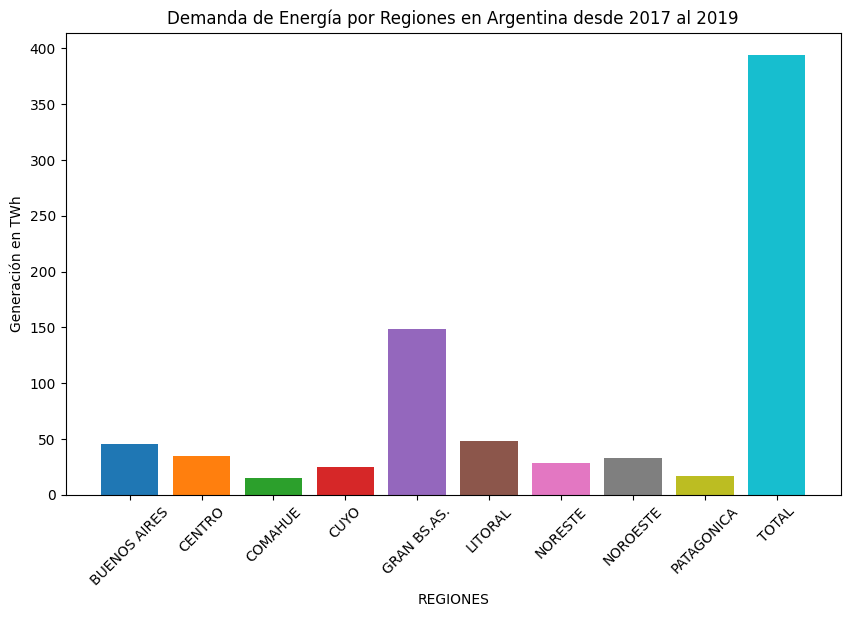

In [57]:
# Gráfico de Demanda por región
plt.figure(figsize=(10, 6))
palette = sns.color_palette() 
plt.bar(data_agrupada_reg['region'], data_agrupada_reg['energia'], color = palette)

plt.title('Demanda de Energía por Regiones en Argentina desde 2017 al 2019')
plt.xlabel('REGIONES')
plt.ylabel('Generación en TWh')
plt.xticks(rotation=45)

plt.show()

#### En los dos gráficos de barra anteriores se observa:
##### que el alto de la barra correspondiente a TOTAL es en proporción la suma de las alturas cada barra de cada tarifa.
##### que el alto de la barra correspondiente a TOTAL es en proporción la suma de las alturas cada barra de cada región. 

### Agrupamiento de Demanda por Región: anio, mes, region

In [58]:
# Diccionario para almacenar los datos agrupados
data = {
    'anio': [],
    'mes': [],
    'region': [],
    'cantidad': [],
    'energia': [],
    'total': []
}

total_general = 0
# Agrupar el DataFrame por 'anio', 'mes', 'region' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_dem_regiones = df_dem.groupby(['anio', 'mes', 'region'])

for (anio, mes, region), grupo in grupo_dem_regiones:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum()) / 1000

    # Agregar los valores al diccionario
    data['anio'].append(anio)
    data['mes'].append(mes)
    data['region'].append(region)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'].append(total_general)  # Actualizar el 'total' general
    total_general += demanda_energia

# Crear el DataFrame
df_demanda_reg = pd.DataFrame(data)

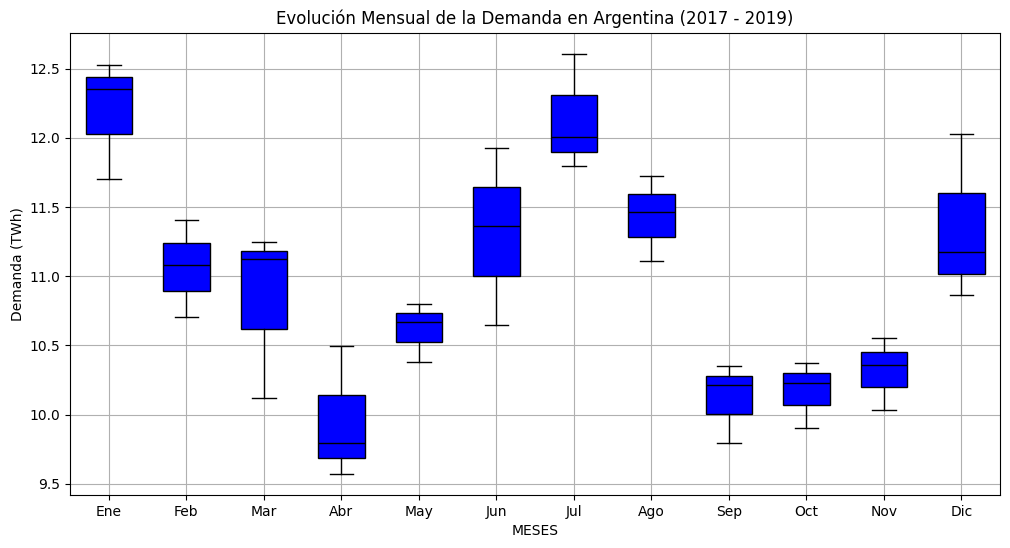

In [59]:
# Gráfico caja de bigotes
colores = ['red', 'green', 'orange']   # Colores para cada año
años = df_demanda_reg['anio'].unique()

# Agrupa y acumula la demanda por mes y año
df_demanda_acumulada = (df_dem.groupby(['mes', 'anio'])['demanda_MWh'].sum()/1000000).reset_index()

plt.figure(figsize=(12, 6))
#plt.style.use('Solarize_Light2')
palette = sns.color_palette()
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Itera sobre los meses y crea una caja de bigotes para cada añ
for mes in range(1, 13):
    demanda_por_mes = df_demanda_acumulada[df_demanda_acumulada['mes'] == mes]['demanda_MWh']
    
    # Crea el boxplot con el mes correspondiente en el eje x
    plt.boxplot(demanda_por_mes, positions=[mes], labels=[meses[mes - 1]], widths=0.6, showfliers=False,
                patch_artist=True, boxprops=dict(facecolor='blue'), medianprops=dict(color='black'))
# Configura el gráfico
plt.title('Evolución Mensual de la Demanda en Argentina (2017 - 2019)')
plt.xlabel('MESES')
plt.ylabel('Demanda (TWh)')
plt.grid(True)
plt.show()

### Agrupamiento de Demanda por Años: Demanda Mensual de los años 2017 al 2019.

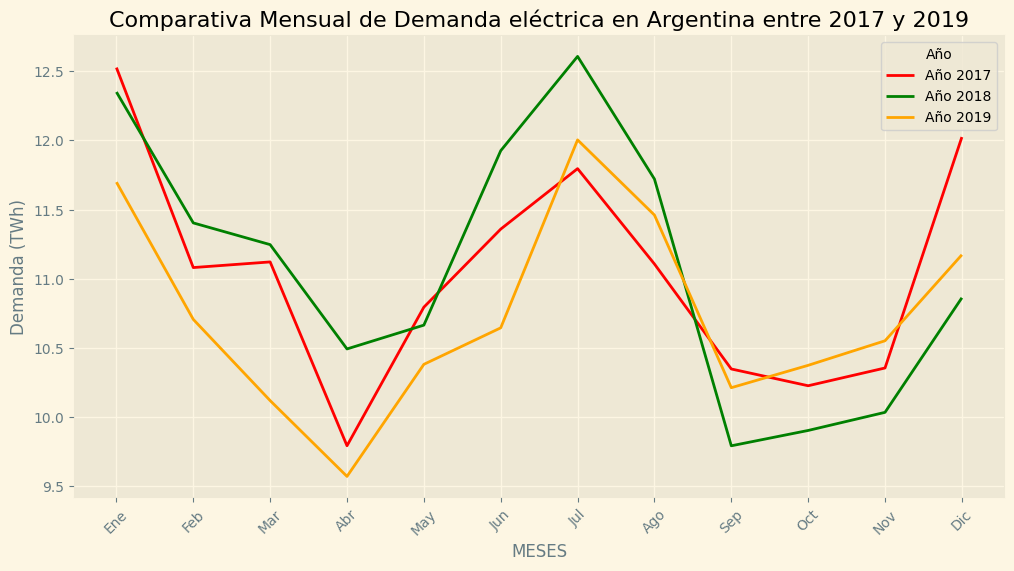

In [66]:
# Grafico comparativo mensual de la Demanda eléctrica entre los años 2017 y 2019
colores = {2017: 'red', 2018: 'green', 2019: 'orange'}

plt.figure(figsize=(12, 6))
plt.style.use('Solarize_Light2')
palette = sns.color_palette()
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Itera sobre los años y crea una línea para cada uno
for year in [2017, 2018, 2019]:
    label = f'Año {year}'
    color = colores[year]
    data_year = df_dem[df_dem['anio'] == year]
    demanda_mensual = (data_year.groupby('mes')['demanda_MWh'].sum() / 1000000).tolist()
    plt.plot(meses, demanda_mensual, label=label, color=color)

# Configura el gráfico
plt.title('Comparativa Mensual de Demanda eléctrica en Argentina entre 2017 y 2019')
plt.xlabel('MESES')
plt.ylabel('Demanda (TWh)')

# Personaliza las etiquetas del eje x con los meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(12), meses, rotation=45)

plt.legend(title='Año', loc='upper right')
plt.grid(True)
plt.show()


#### En éste gráfico se observan los máximos picos en diferentes períodos de cada año, como las demandas mínimas.

### Unión de dataset de Demanda y Generación para agrupar por Años

In [67]:
# Acumulado de Demanda 2017
df_dem_2017 = df_dem[df_dem['anio'] == 2017]
df_demanda_anual_2017 = df_dem_2017.groupby(['anio', 'mes'])['demanda_MWh'].sum()/1000000

In [68]:
# Acumulado de Demanda 2018
df_dem_2018 = df_dem[df_dem['anio'] == 2018]
df_demanda_anual_2018 = df_dem_2018.groupby(['anio', 'mes'])['demanda_MWh'].sum()/1000000

In [69]:
# Acumulado de Demanda 2019
df_dem_2019 = df_dem[df_dem['anio'] == 2019]
df_demanda_anual_2019 = df_dem_2019.groupby(['anio', 'mes'])['demanda_MWh'].sum()/1000000

In [70]:
# Acumulado de Generacion 2017
df_gen_2017 = df_gen[df_gen['anio'] == 2017]
df_generacion_anual_2017 = df_gen_2017.groupby(['anio', 'mes'])['generacion_neta_MWh'].sum()/1000000

In [71]:
# Acumulado de Generacion 2018
df_gen_2018 = df_gen[df_gen['anio'] == 2018]
df_generacion_anual_2018 = df_gen_2018.groupby(['anio', 'mes'])['generacion_neta_MWh'].sum()/1000000

In [72]:
# Acumulado de Generacion 2019
df_gen_2019 = df_gen[df_gen['anio'] == 2019]
df_generacion_anual_2019 = df_gen_2019.groupby(['anio', 'mes'])['generacion_neta_MWh'].sum()/1000000

In [73]:
# Combina los DataFrames en uno SOLO - año 2017
# Después de realizar la operación de agrupación, utiliza reset_index para convertir las Series en DataFrames
df_demanda_anual_2017 = df_demanda_anual_2017.reset_index()
df_generacion_anual_2017 = df_generacion_anual_2017.reset_index()

# Ahora puedes unir los DataFrames
df_combinado_2017 = df_demanda_anual_2017.merge(df_generacion_anual_2017, on=['anio', 'mes'], suffixes=('_demanda', '_generacion'))

# Renombrar las columnas para mayor claridad
df_combinado_2017 = df_combinado_2017.rename(columns={'demanda_MWh_demanda': 'demanda_anual_2017_TWh', 'generacion_neta_MWh_generacion': 'generacion_anual_2017_TWh'})

# Ahora df_combinado_2017 contiene tanto la demanda anual 2017 como la generación anual 2017 en TWh

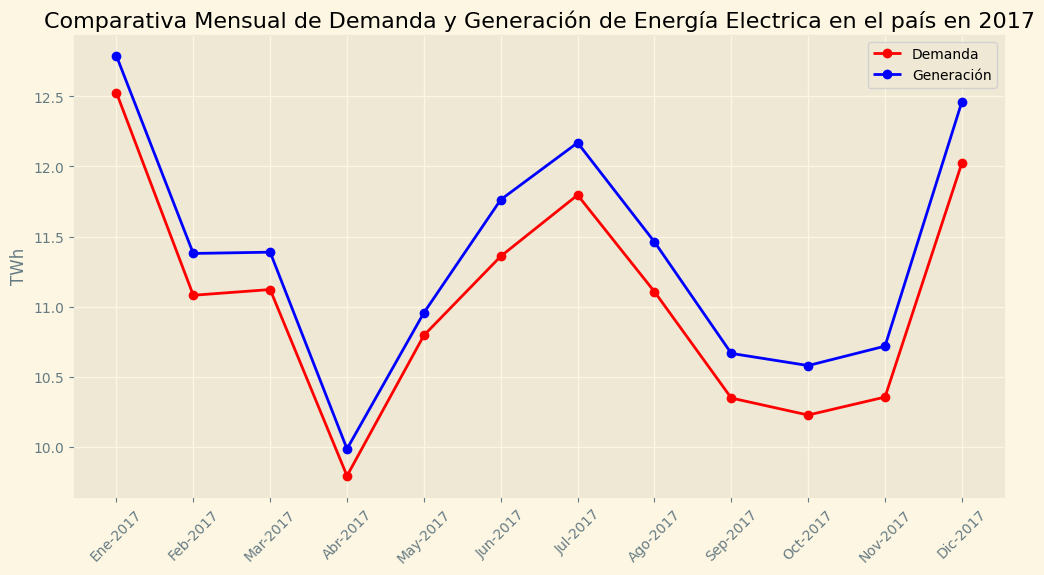

In [74]:
# Gráfico de serie temporal Año 2017
plt.figure(figsize=(12, 6))
plt.plot(df_combinado_2017['anio'].astype(str) + '-' + df_combinado_2017['mes'].astype(str), df_combinado_2017['demanda_MWh'], label='Demanda', marker='o', color = 'red')
plt.plot(df_combinado_2017['anio'].astype(str) + '-' + df_combinado_2017['mes'].astype(str), df_combinado_2017['generacion_neta_MWh'], label='Generación', marker='o', color = 'blue')
#plt.xlabel('')
plt.ylabel('TWh')
meses = ['Ene-2017', 'Feb-2017', 'Mar-2017', 'Abr-2017', 'May-2017', 'Jun-2017', 'Jul-2017', 'Ago-2017', 'Sep-2017', 'Oct-2017', 'Nov-2017', 'Dic-2017']
plt.xticks(range(12), meses, rotation=45)

plt.title('Comparativa Mensual de Demanda y Generación de Energía Electrica en el país en 2017')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Combina los DataFrames en uno SOLO - año 2018
# Después de realizar la operación de agrupación, utiliza reset_index para convertir las Series en DataFrames
df_demanda_anual_2018 = df_demanda_anual_2018.reset_index()
df_generacion_anual_2018 = df_generacion_anual_2018.reset_index()

# Ahora puedes unir los DataFrames
df_combinado_2018 = df_demanda_anual_2018.merge(df_generacion_anual_2018, on=['anio', 'mes'], suffixes=('_demanda', '_generacion'))

# Renombrar las columnas para mayor claridad
df_combinado_2018 = df_combinado_2018.rename(columns={'demanda_MWh_demanda': 'demanda_anual_2018_TWh', 'generacion_neta_MWh_generacion': 'generacion_anual_2018_TWh'})

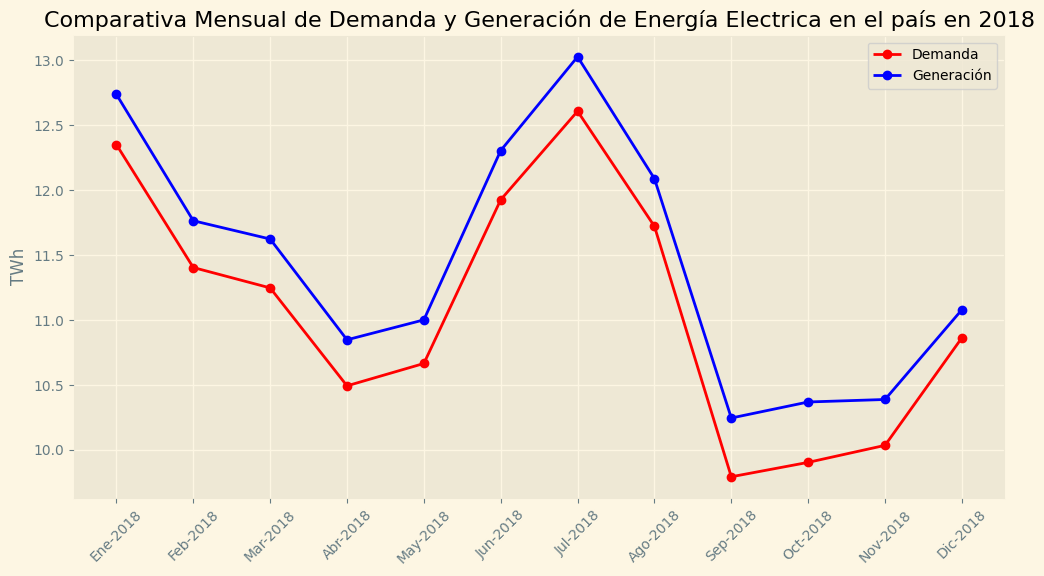

In [76]:
# Gráfico de serie temporal Año 2018
plt.figure(figsize=(12, 6))
plt.plot(df_combinado_2018['anio'].astype(str) + '-' + df_combinado_2018['mes'].astype(str), df_combinado_2018['demanda_MWh'], label='Demanda', marker='o', color = 'red')
plt.plot(df_combinado_2018['anio'].astype(str) + '-' + df_combinado_2018['mes'].astype(str), df_combinado_2018['generacion_neta_MWh'], label='Generación', marker='o', color = 'blue')
#plt.xlabel('')
plt.ylabel('TWh')
meses = ['Ene-2018', 'Feb-2018', 'Mar-2018', 'Abr-2018', 'May-2018', 'Jun-2018', 'Jul-2018', 'Ago-2018', 'Sep-2018', 'Oct-2018', 'Nov-2018', 'Dic-2018']
plt.xticks(range(12), meses, rotation=45)

plt.title('Comparativa Mensual de Demanda y Generación de Energía Electrica en el país en 2018')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Combina los DataFrames en uno SOLO - año 2019
# Después de realizar la operación de agrupación, utiliza reset_index para convertir las Series en DataFrames
df_demanda_anual_2019 = df_demanda_anual_2019.reset_index()
df_generacion_anual_2019 = df_generacion_anual_2019.reset_index()

# Ahora puedes unir los DataFrames
df_combinado_2019 = df_demanda_anual_2019.merge(df_generacion_anual_2019, on=['anio', 'mes'], suffixes=('_demanda', '_generacion'))

# Renombrar las columnas para mayor claridad
df_combinado_2019 = df_combinado_2019.rename(columns={'demanda_MWh_demanda': 'demanda_anual_2019_TWh', 'generacion_neta_MWh_generacion': 'generacion_anual_2019_TWh'})

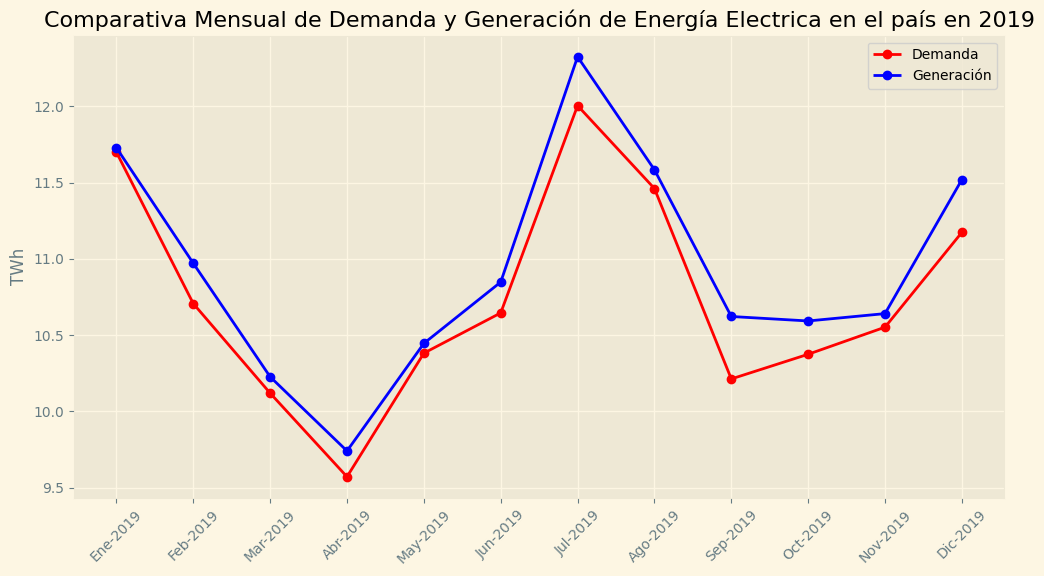

In [78]:
# Gráfico de serie temporal Año 2019
plt.figure(figsize=(12, 6))
plt.plot(df_combinado_2019['anio'].astype(str) + '-' + df_combinado_2019['mes'].astype(str), df_combinado_2019['demanda_MWh'], label='Demanda', marker='o', color = 'red')
plt.plot(df_combinado_2019['anio'].astype(str) + '-' + df_combinado_2019['mes'].astype(str), df_combinado_2019['generacion_neta_MWh'], label='Generación', marker='o', color = 'blue')
#plt.xlabel('')
plt.ylabel('TWh')
meses = ['Ene-2019', 'Feb-2019', 'Mar-2019', 'Abr-2019', 'May-2019', 'Jun-2019', 'Jul-2019', 'Ago-2019', 'Sep-2019', 'Oct-2019', 'Nov-2019', 'Dic-2019']
plt.xticks(range(12), meses, rotation=45)

plt.title('Comparativa Mensual de Demanda y Generación de Energía Electrica en el país en 2019')
plt.legend()
plt.grid(True)
plt.show()

#### En los últimos tres gráficos se observan que la linea de demanda siempre está por debajo de la linea de generación de energia eléctrica.

### Preparar datos para probar y entrenar el modelo. Demanda y Generación  por anio, mes, region

In [ ]:
#pd.set_option('display.max_rows', None)
#print(filas_sel)

# Restablece la opción de visualización a su valor predeterminado
#pd.reset_option('display.max_rows')

In [79]:
# Diccionario para almacenar los datos agrupados  ------- DEMANDA
data = {
    'anio': [],
    'mes': [],
    'cantidad': [],
    'energia': [],
    'total': []
}
#total_general = 0
# Agrupar el DataFrame por 'anio', 'mes' y calcular la suma de 'demanda_MWh' para cada grupo
grupo_dem = df_dem.groupby(['anio', 'mes'])

for (anio, mes), grupo in grupo_dem:
    cantidad_registros = len(grupo)
    demanda_energia = (grupo['demanda_MWh'].sum()) / 1000000

    # Agregar los valores al diccionario
    data['anio'].append(anio)
    data['mes'].append(mes)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(demanda_energia)
    data['total'].append(demanda_energia)     #(total_general) # Actualizar el 'total' general
    total_general += demanda_energia

# Crear el DataFrame
df_demanda_reg = pd.DataFrame(data)

# Agrupa el DataFrame por 'anio' y 'mes' y calcula la suma de 'energia' mensual
df_demanda_reg['total'] = df_demanda_reg.groupby(['anio', 'mes'])['energia'].transform('sum')

In [82]:
# Diccionario para almacenar los datos agrupados   ------- GENERACION
data = {
    'anio': [],
    'mes': [],
    'cantidad': [],
    'energia': [],
    'total': []
}
total_general = 0
# Agrupar el DataFrame por 'anio', 'mes' y calcular la suma de 'generacion_neta_MWh' para cada grupo
grupo_gen = df_gen.groupby(['anio', 'mes'])

for (anio, mes), grupo in grupo_gen:
    cantidad_registros = len(grupo)
    generacion_energia = (grupo['generacion_neta_MWh'].sum()) / 1000000

    # Agregar los valores al diccionario
    data['anio'].append(anio)
    data['mes'].append(mes)
    data['cantidad'].append(cantidad_registros)
    data['energia'].append(generacion_energia)
    data['total'].append(generacion_energia)     #(total_general)  # Actualizar el 'total' general
    total_general += generacion_energia

# Crear el DataFrame
df_generacion_reg = pd.DataFrame(data)
#df_generacion_reg

# Agrupa el DataFrame por 'anio' y 'mes' y calcula la suma de 'energia' mensual
df_generacion_reg['total'] = df_generacion_reg.groupby(['anio', 'mes'])['energia'].transform('sum')

In [83]:
# Combina los DataFrames en uno SOLO
df_combinado = df_demanda_reg.merge(df_generacion_reg, on=['anio', 'mes'])

In [84]:
df_combinado.describe()

,anio,mes,cantidad_x,energia_x,total_x,cantidad_y,energia_y,total_y
count,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,6.50000,1058.444444,10.957079,10.957079,509.805556,11.251184,11.251184
std,0.828079,3.50102,200.132591,0.817386,0.817386,58.253054,0.847113,0.847113
min,2017.000000,1.00000,758.000000,9.572131,9.572131,401.000000,9.741266,9.741266
25%,2017.000000,3.75000,768.000000,10.353942,10.353942,470.500000,10.615055,10.615055
50%,2018.000000,6.50000,1171.000000,10.829113,10.829113,521.500000,11.040218,11.040218
75%,2019.000000,9.25000,1195.750000,11.520443,11.520443,554.500000,11.763313,11.763313
max,2019.000000,12.00000,1249.000000,12.607553,12.607553,585.000000,13.026648,13.026648


### Determinación de matriz de correlación y Coeficientes de Pearson, Spearman y Kendall.
#### Demanda por regiones.

In [85]:
# Calculamos matriz de correlacion de todo el conjunto de datos
matriz_correlacion = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y','total_y']].corr()

# Imprime la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)

Matriz de Correlación:
            cantidad_x  energia_x   total_x  cantidad_y  energia_y   total_y
cantidad_x    1.000000   0.182940  0.182940   -0.683119   0.244114  0.244114
energia_x     0.182940   1.000000  1.000000   -0.185228   0.990847  0.990847
total_x       0.182940   1.000000  1.000000   -0.185228   0.990847  0.990847
cantidad_y   -0.683119  -0.185228 -0.185228    1.000000  -0.207488 -0.207488
energia_y     0.244114   0.990847  0.990847   -0.207488   1.000000  1.000000
total_y       0.244114   0.990847  0.990847   -0.207488   1.000000  1.000000


### Matriz de calor entre variables explicativas

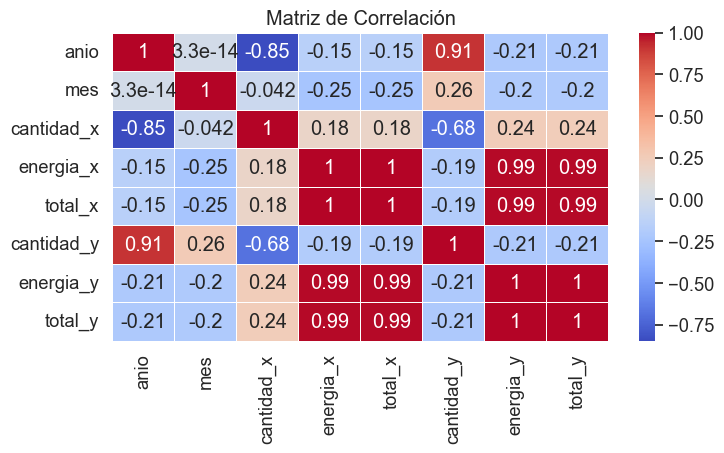

In [87]:
# Calcula la matriz de correlación entre variables explicativas
correlation_matrix = df_combinado.corr()

# Crea un gráfico de barras de los coeficientes de correlación
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)  # Ajusta el tamaño de fuente

# Utiliza seaborn para crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")

# Muestra el gráfico
plt.show()

In [88]:
# Calcular el coeficiente de correlación de Pearson
correlacion_pearson = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y', 'total_y']].corr(method='pearson')

# Calcular el coeficiente de correlación de Spearman
correlacion_spearman = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y', 'total_y']].corr(method='spearman')

# Calcular el coeficiente de correlación de Kendall
correlacion_kendall = df_combinado[['cantidad_x', 'energia_x', 'total_x','cantidad_y', 'energia_y', 'total_y']].corr(method='kendall')

print("Coeficiente de Correlación de Pearson:")
print(correlacion_pearson)

print("Coeficiente de Correlación de Spearman:")
print(correlacion_spearman)

print("Coeficiente de Correlación de Kendall:")
print(correlacion_kendall)


Coeficiente de Correlación de Pearson:
            cantidad_x  energia_x   total_x  cantidad_y  energia_y   total_y
cantidad_x    1.000000   0.182940  0.182940   -0.683119   0.244114  0.244114
energia_x     0.182940   1.000000  1.000000   -0.185228   0.990847  0.990847
total_x       0.182940   1.000000  1.000000   -0.185228   0.990847  0.990847
cantidad_y   -0.683119  -0.185228 -0.185228    1.000000  -0.207488 -0.207488
energia_y     0.244114   0.990847  0.990847   -0.207488   1.000000  1.000000
total_y       0.244114   0.990847  0.990847   -0.207488   1.000000  1.000000
Coeficiente de Correlación de Spearman:
            cantidad_x  energia_x   total_x  cantidad_y  energia_y   total_y
cantidad_x    1.000000  -0.005154 -0.005154   -0.761614   0.061457  0.061457
energia_x    -0.005154   1.000000  1.000000   -0.200669   0.985328  0.985328
total_x      -0.005154   1.000000  1.000000   -0.200669   0.985328  0.985328
cantidad_y   -0.761614  -0.200669 -0.200669    1.000000  -0.253443 -0.2534

### Separa datos de prueba y entrenamiento para el modelo para predecir demanda con generacion.

In [89]:
### Separa datos de prueba y entrenamiento para el modelo.
# DataFrame llamado 'data' con las características (X) y las etiquetas (y)
X = df_combinado[['cantidad_x', 'energia_x','total_x']]
y = df_combinado[['cantidad_y', 'energia_y','total_y']]

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train y y_train son los datos de entrenamiento
# X_test y y_test son los datos de prueba


### Modelo de Regresión Lineal.

In [90]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo en los datos de entrenamiento
modelo.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir el valor de R^2
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.6442415957288187
